In [1]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt

m4a_file = 'popcorn.m4a'
wav_filename = r"popcorn.wav"
from pydub import AudioSegment
track = AudioSegment.from_file(m4a_file, format= 'm4a')
file_handle = track.export(wav_filename, format='wav')

In [2]:
[Fs, x] = audioBasicIO.read_audio_file("popcorn.wav")

In [9]:
import numpy as np
from scipy import signal, misc

In [10]:
window = 0.02
samp = 0.0005

F, f_names = ShortTermFeatures.feature_extraction(x, Fs, window*Fs, samp*Fs)

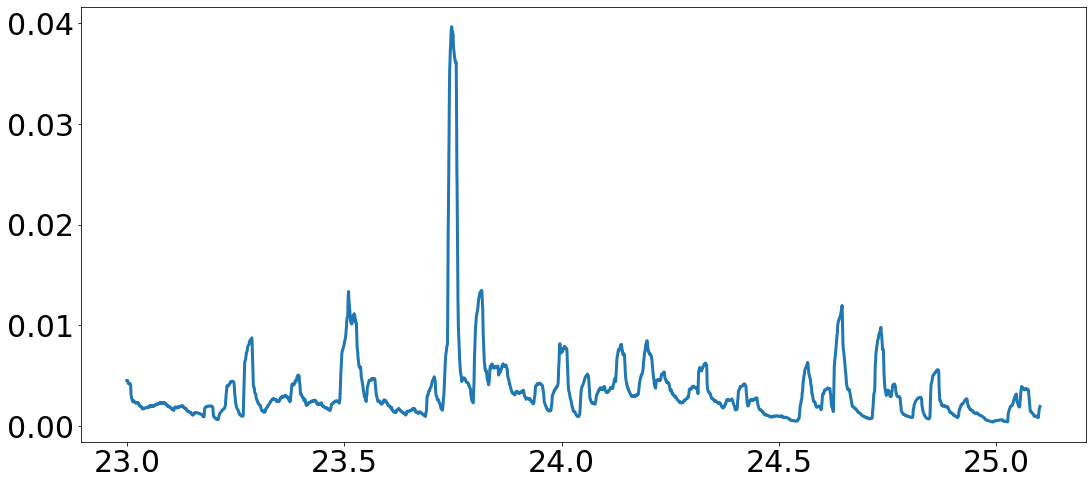

In [199]:
sig_len_idx = len(F[2, :])

start = 23.0
end = 25.1

sig_len = samp*sig_len_idx
start_idx = int(start//samp)
end_idx = int(end//samp)



ts = np.arange(start, end, samp)


fig, ax = plt.subplots(figsize=(18, 8))


ax.plot(ts, F[1, start_idx:end_idx], linewidth=3)
ax.tick_params(axis='both', which='major', labelsize=30)
#plt.legend(loc="best")
#plt.savefig("popcorn.png")
plt.show()

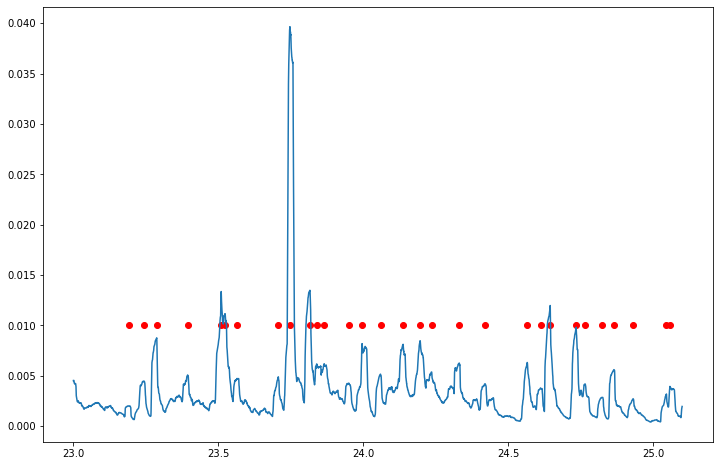

In [200]:
x = F[1, start_idx:end_idx]
peaks, properties = signal.find_peaks(x, prominence=(0.001, 1))

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ts, x)
ax.scatter([ts[peak] for peak in peaks], 0.01*np.ones(len(peaks)), color="red")
plt.show()

In [73]:
peaks

array([ 1996,  3966,  4067,  7850,  8204,  8327, 11374, 11611, 12843,
       13048, 15275, 15424, 15909, 16479, 16863, 17753, 17835, 18419,
       18807, 18926, 19008, 19858, 20467, 20943, 21015, 21307, 23977,
       24212, 24436, 24534, 24719, 26032, 26295, 26659, 27302, 27990,
       28412, 28464, 28818, 28963, 29094, 29449, 29739, 29852, 30109,
       30397, 31144, 31431, 31756, 31935, 32053, 32240, 32465, 32577,
       32695, 32718, 32791, 32817, 32954, 33090, 33190, 33414, 33517,
       33641, 33784, 33812, 33916, 34040, 34175, 34844, 35719, 35945,
       36024, 36298, 36794, 37062, 37165, 37250, 37333, 37456, 37760,
       37852, 37931, 38281, 38350, 38493, 38699, 38830, 38951, 39203,
       39383, 39453, 39525, 39694, 39869, 39959, 40112, 40205, 40329,
       40463, 40688, 41068, 41355, 41526, 41662, 41710, 41893, 42432,
       42638, 43306, 43590, 43741, 43996, 44059, 44130, 44183, 44411,
       44566, 44702, 44791, 44931, 44986, 45097, 45265, 45300, 45458,
       45530, 45592,

In [82]:
peak_ts = [ts[peak] for peak in peaks]

his = np.histogram(peak_ts)
his
print(sum())

(array([ 6,  9, 15, 21, 43, 43, 55, 40, 16,  7]),
 array([ 0.998  ,  4.76835,  8.5387 , 12.30905, 16.0794 , 19.84975,
        23.6201 , 27.39045, 31.1608 , 34.93115, 38.7015 ]))

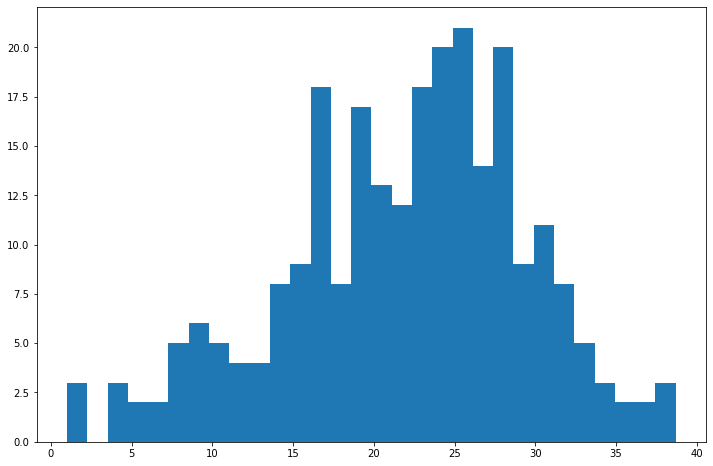

In [150]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(peak_ts, bins=30)
plt.show()

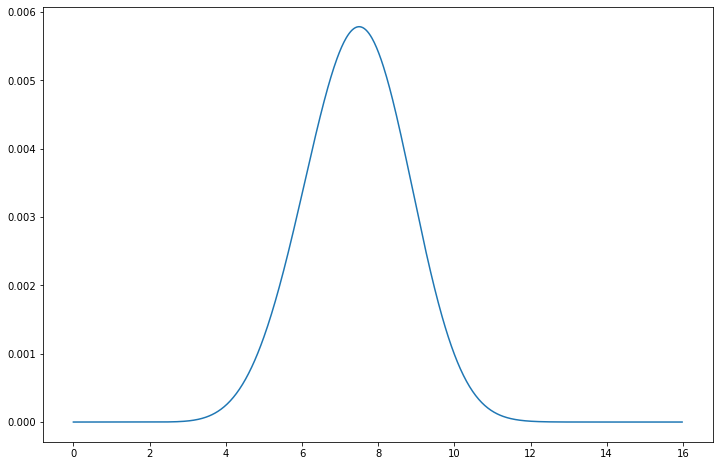

In [205]:
def prob(t, V, a, b):
    
    return np.exp(-V/(a*t+b))

def prob_popping(n, dt, V, a, b):
    
    p = 1.0 - prob(dt/2, V, a,b )
    
    for i in range(1, n):
        p*= 1.0- prob((2*i-1)*dt/2, V, a,b )
    
    p*=prob((2*n-1)*dt/2, V, a,b )
    
    return p

V = 1000.0
a = 30.0
b = 0.01
dt = 0.02
N = 800

ts = np.arange(0.0, N*dt, dt)
probs = [prob(t, V, a, b) for t in ts]
pop = [prob_popping(n, dt, V, a, b) for n in range(1, N+1)]


fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ts, pop)
plt.show()

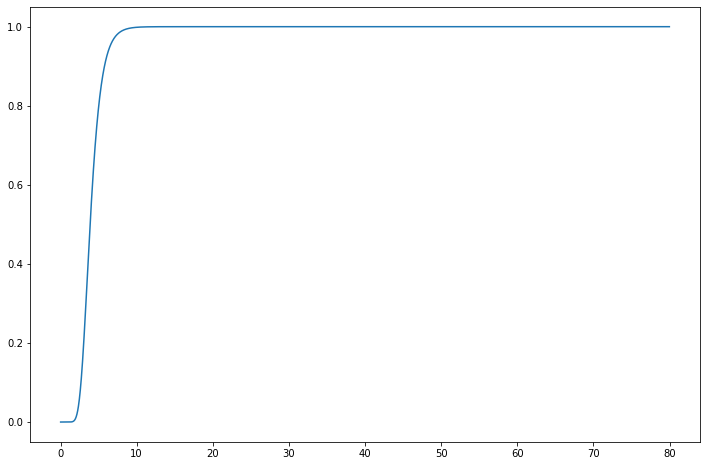

In [204]:
ts = np.arange(0.0, 5*N*dt, dt)
probs = [prob(t, V, a, b) for t in ts]
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ts, probs)
plt.show()

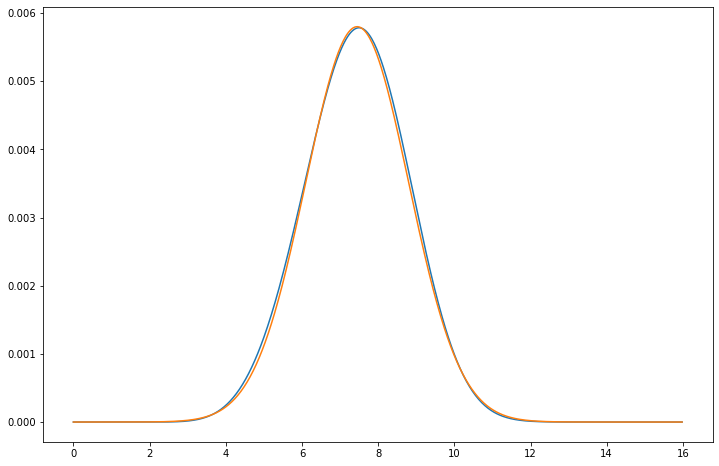

In [193]:
def gaussian(t, A, μ, σ):
    
    
    return A*np.exp(-((t-μ)**2)/(2*σ**2))

ts = np.arange(0.0, N*dt, dt)
probs = [prob(t, V, a, b) for t in ts]
pop = [prob_popping(n, dt, V, a, b) for n in range(1, N+1)]


μ = 7.45
σ = 1.35
A = 0.0058

gauss = [gaussian(t, A, μ, σ) for t in ts]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ts, pop)
ax.plot(ts, gauss)
plt.show()

In [213]:
def prob_popping_test(n, dt, V, a, b):
    
    p = 1.0 - prob(dt/2, V, a,b )
    
    for i in range(1, n):
        p*= 1.0- prob((2*i-1)*dt/2, V, a, b)
    
    p*=prob((2*n-1)*dt/2, V, a,b )
    
    return p


n = 300

prob_popping_test(n, dt, V, a, b)

0.003282747858840398